In [69]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

treino = pd.read_excel("BaseInadimplencia.xlsx", sheet_name='treino')
teste = pd.read_excel("BaseInadimplencia.xlsx", sheet_name='teste')

In [70]:
treino.head(2)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0


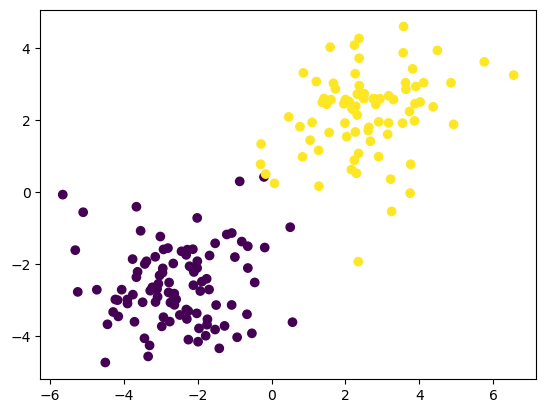

In [71]:
fig, ax = plt.subplots()

ax.scatter(teste.SaldoConta, teste.SaldoInvestimento, c=teste.Situacao)
plt.show()

In [72]:
X_treino = treino.drop('Situacao', axis=1)
y_treino = treino.Situacao

X_teste = teste.drop('Situacao', axis=1)
y_teste = teste.Situacao

In [73]:
clfLR = LogisticRegression(random_state=0).fit(X_treino, y_treino)

treino['y_RegLog'] = clfLR.predict(X_treino)

teste['y_RegLog'] = clfLR.predict(X_teste)

In [74]:
clfDT = DecisionTreeClassifier(random_state=0).fit(X_treino, y_treino)

treino['y_Arvore'] = clfDT.predict(X_treino)

teste['y_Arvore'] = clfDT.predict(X_teste)

In [75]:
teste.head(2)

,SaldoConta,SaldoInvestimento,Situacao,y_RegLog,y_Arvore
0,-1.992492,-4.158429,0,0,0
1,-3.306014,-4.261263,0,0,0


In [76]:
confusion_matrix(teste.Situacao, teste.y_RegLog)

array([[98,  1],
       [ 0, 79]], dtype=int64)

In [77]:
confusion_matrix(teste.Situacao, teste.y_Arvore)

array([[97,  2],
       [ 1, 78]], dtype=int64)

In [78]:
accuracy_score(teste.Situacao,teste.y_RegLog)

0.9943820224719101

In [79]:
accuracy_score(teste.Situacao,teste.y_Arvore)

0.9831460674157303

In [80]:
precision_score(teste.Situacao, teste.y_RegLog)

0.9875

In [81]:
recall_score(teste.Situacao, teste.y_RegLog)

1.0

In [82]:
recall_score(teste.Situacao, teste.y_Arvore)

0.9873417721518988